In [1]:
from extract_feature import extract_feature
import torchvision.transforms as transforms
from PIL import Image
from kmeans import cluster
import numpy as np
import torch
import os

In [2]:
# img = Image.open("1.png")

# transform = transforms.Compose([
#     transforms.PILToTensor()
# ])

# img_tensor = transform(img)
# img_tensor = torch.permute(img_tensor, (1,2,0))
# img_tensor = img_tensor[None, :, :, :]

# print(img_tensor.shape)

feature_list = extract_feature("./test_img/")

# kmeans = KMeans(feature_list=feature_list)

ResNet loaded!
<PIL.Image.Image image mode=RGB size=58x143 at 0x169C8AD30>
0
<PIL.Image.Image image mode=RGB size=133x107 at 0x169C92FA0>
1
<PIL.Image.Image image mode=RGB size=89x57 at 0x169C92F40>
2
<PIL.Image.Image image mode=RGB size=71x100 at 0x169C92FA0>
3
<PIL.Image.Image image mode=RGB size=61x68 at 0x169C92FD0>
4
<PIL.Image.Image image mode=RGB size=57x55 at 0x169C92F40>
5


In [3]:
import pandas as pd

df = pd.DataFrame(feature_list)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.305254,2.340773,-0.171375,1.935242,1.858270,4.670110,-0.834942,-2.328127,-1.895349,-2.943299,...,-0.739597,0.607432,-3.355406,-1.309016,-0.608816,1.538103,1.215807,-1.646749,-0.092987,-0.524173
1,0.312336,7.168859,-0.182858,0.050200,-0.486589,3.921198,-0.635423,-3.473098,-3.458824,-1.469594,...,0.420601,1.819507,-3.893197,-2.216666,1.894766,1.758763,0.563636,-2.174332,0.586538,0.495313
2,1.229339,3.974082,1.756768,4.288001,2.885709,9.007705,3.076536,-2.447413,-1.671067,-2.323145,...,-0.768772,1.037657,-2.469941,-0.383532,-0.404691,1.840932,0.825107,0.461856,0.542844,-1.218157
3,0.159268,4.215987,-0.991799,0.093751,-1.121707,3.812661,-0.473834,-2.701144,-2.980618,-4.517895,...,3.599993,-0.050826,-4.110219,-0.506561,1.138406,1.848336,1.015224,-0.205628,1.759547,-1.082522
4,1.247789,5.306578,0.662413,2.346899,3.447447,5.680551,1.856517,-0.531940,-0.818837,-0.771010,...,0.340791,1.585362,-1.385696,-0.715436,1.068972,1.187760,0.733248,0.093536,0.967791,0.133107
5,1.084752,3.597060,-0.124837,2.064705,2.689809,6.206352,0.772295,-1.594408,-1.841112,-3.524063,...,2.572202,0.284374,-1.181314,0.781106,0.383246,3.187403,2.575464,1.360534,0.056379,-1.070101


In [6]:
kmeans = cluster(feature_list=feature_list, n_clusters=6)

In [ ]:
np.savetxt('test.txt', kmeans.labels_)

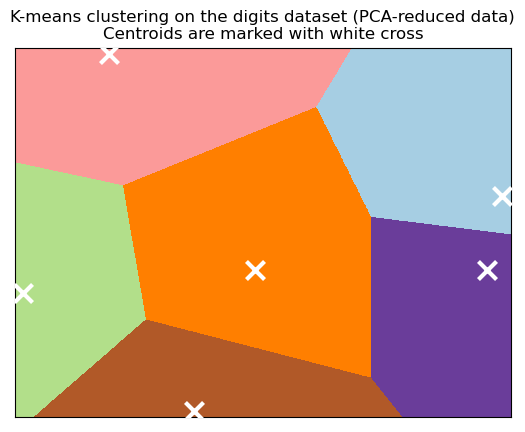

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(feature_list)
k = KMeans(init="k-means++", n_clusters=6, n_init=10)
k.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = k.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = k.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()